In [10]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [11]:
# import units needed in the model
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter


<Unit('meter')>

In [82]:
params = Params( 
                g_a = - 9.8 * m / s **2,    # gravitational acceleration
                v_init = 10 * m / s,       # initial velocity
                y_init = 0.1 * m,            # initial position
                m_frog = 0.1 * kg,        # mass of the frog
                r_lilypad = 0.1 * m,      # radius of lilypad
                ρ = 1e3 * kg / m**3,      # density of water 
                t_0 = 0 * s,
                t_end = 300 * s)

,values
g_a,-9.8 meter / second ** 2
v_init,10.0 meter / second
y_init,0.1 meter
m_frog,0.1 kilogram
r_lilypad,0.1 meter
ρ,1000.0 kilogram / meter ** 3
t_0,0 second
t_end,300 second


In [83]:
def make_system(params):
    
    unpack(params)
    
    area = np.pi * (r_lilypad)**2
    init = State(y=y_init, v=v_init)
    t_0 = 0 * s
    t_end = 30 * s
    
    return System(params, area = area, init = init)

In [84]:
system = make_system(params)


,values
g_a,-9.8 meter / second ** 2
v_init,10.0 meter / second
y_init,0.1 meter
m_frog,0.1 kilogram
r_lilypad,0.1 meter
ρ,1000.0 kilogram / meter ** 3
t_0,0 second
t_end,300 second
area,0.031415926535897934 meter ** 2
init,y 0.1 meter v 10.0 meter / sec...


In [85]:
def slope_func(state, t, system):

    y, v = state
    unpack(system)
    
    #sqrt(2 * g_a * y)- g_a * (t*s) 
    dydt = v                              #velocity at certain point
    dvdt = g_a                            #acceleration due to gravity 
    
    return dydt, dvdt

In [86]:
slope_func(system.init, 0, system)

(<Quantity(10.0, 'meter / second')>, <Quantity(-9.8, 'meter / second ** 2')>)

In [87]:
def event_func(state, t, system):
    """Return the height of the penny above the sidewalk.
    """
    y, v = state
    return y

In [90]:
results, details = run_ode_solver(system, slope_func, events=event_func, max_step=0.1*s)
details.message
results

,y,v
0.000000,1.000000e-01,10.000000
0.014212,2.411264e-01,9.860726
0.114212,1.178199e+00,8.880726
0.214212,2.017272e+00,7.900726
0.314212,2.758344e+00,6.920726
0.414212,3.401417e+00,5.940726
0.514212,3.946490e+00,4.960726
0.614212,4.393562e+00,3.980726
0.714212,4.742635e+00,3.000726
0.814212,4.993707e+00,2.020726


Saving figure to file figs/chap09-fig02.pdf


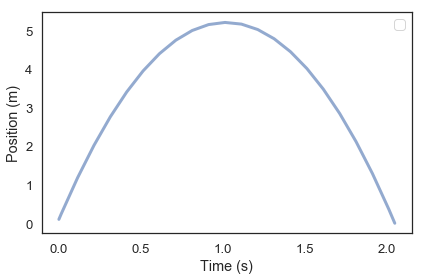

In [91]:
def plot_position(results):
    plot(results.y)
    decorate(xlabel='Time (s)',
             ylabel='Position (m)')
    
plot_position(results)
savefig('figs/chap09-fig02.pdf')

In [ ]:
# set up initial values

v = Vector(0, 0) * m / s       # velocity vector of the frog
p_frog = Vector(0, 0) * m      # position vector of the frog
p_lily = Vector(0, 0) * m      # position vector of the lilypad

# By setting uo initial velocity manually, a certain maximum height is determined
# We can sweep through a series of initial velocity



In [ ]:
# set up system values

# the frog is treated as point mass



def make_system(params):

    unpack(params)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x_frog = p_frog.x,
                 y_frog = p_frog.y,
                 x_lily = p_lily.x,
                 y_lily = p_lily.y,
                 vx = v.x,
                 vy = v.y)
    
    # compute area from radius
    area = np.pi * r **2
    
    return System(params, init=init, area=area)

I think we can model the lilypad as a sphere and apply the equation of spherical object submerged in water. Thus, if the volumn in water is greater than a certain value that water starts to leak in the lilypad, we know that the lilypad will sink. 

In [ ]:
def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x_frog, y_frog, vx, vy = state
    unpack(system)

    V = Vector(vx, vy)    
    o_frog = Vector(x_frog, y_frog)
    o_lily = Vector(x_lily, y_lily)

    
    return vx, vy, 